In [1]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_default_data.csv",low_memory=False)


In [4]:
np.array(df.columns)

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan',
       'desc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'loan_status'], dtype=object)

In [5]:
description = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Dictionary.xlsx').dropna()
description.style.set_properties(subset=['Description'], **{'width' :'850px'})

,#,Fields,Description
0,1,member_id,A unique Id for the borrower member.
1,2,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
2,3,funded_amnt,The total amount committed to that loan at that point in time.
3,4,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
4,5,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
5,6,int_rate,Interest Rate on the loan
6,7,installment,The monthly payment owed by the borrower if the loan originates.
7,8,grade,Assigned loan grade
8,9,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9,10,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."


In [6]:
print(f"{df.dtypes}\n")

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
pymnt_plan                  object
desc                        object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
open_acc                     int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [7]:
df.shape

(226786, 41)

In [8]:
df['loan_status'].value_counts()

Fully Paid    207723
Default        19063
Name: loan_status, dtype: int64

In [9]:
target = [1 if i=='Fully Paid' else 0 for i in df['loan_status']] #converting loan status column to a binary column of 1 and 0 and creating a new column called target 
df['target'] = target
df['target'].value_counts()

1    207723
0     19063
Name: target, dtype: int64

In [ ]:
#there are columns that fall into the category of redundant data like loan description, purpose of the loan, credit line etc. Hence dropping those columns. 

In [10]:
df.drop(columns=['desc','next_pymnt_d','earliest_cr_line'],axis = 1,inplace = True)

In [11]:
df['member_id'].value_counts().head(5)

5246974     1
23843884    1
6337600     1
740415      1
18574395    1
Name: member_id, dtype: int64

Since no customer has taken loan again, we can drop member id too.

In [12]:
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{df.isnull().sum()}")

Sum of null values in each feature:
-----------------------------------
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                   8400
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
pymnt_plan                      0
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
mths_since_last_delinq     124638
open_acc                        0
revol_bal                       0
revol_util                    164
total_acc                       0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymn

In [13]:
df.drop(['member_id'], axis=1, inplace=True)

In [14]:
df['target'].value_counts()

1    207723
0     19063
Name: target, dtype: int64

# Exploratory Data Analysis

Now I would like to know the distribution of Data types

In [15]:

# Let us see how many Object type features are actually Categorical
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
emp_length              11
home_ownership           6
verification_status      3
issue_d                103
pymnt_plan               2
purpose                 14
addr_state              51
last_pymnt_d            97
last_credit_pull_d     102
application_type         2
loan_status              2
dtype: int64

We should have a look at the distribution of Employement Lengths too

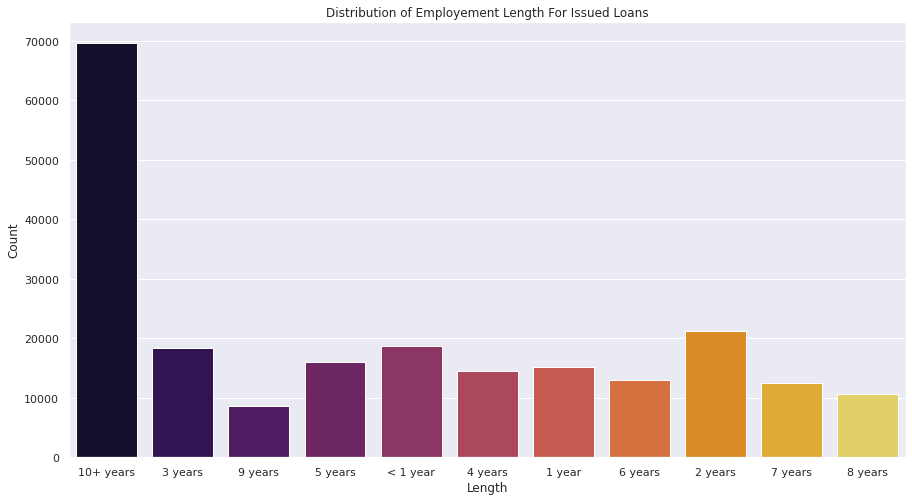

In [17]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()


Well, it can be seen that people who have worked for 10 or more years are more likely to take loans

In [18]:
corr = df.corr() #finding the correlation of other variables with target

In [19]:
for col in corr.columns:
  if corr[col]['target']>=0.3 or corr[col]['target']<=-0.3:
    print(col)

out_prncp
out_prncp_inv
total_rec_prncp
target


In [20]:
corr['target']

loan_amnt                 -0.079964
funded_amnt               -0.081449
funded_amnt_inv           -0.084009
int_rate                  -0.161670
installment               -0.064817
annual_inc                 0.010611
dti                       -0.126062
delinq_2yrs               -0.064362
inq_last_6mths            -0.001586
mths_since_last_delinq     0.046028
open_acc                  -0.046765
revol_bal                 -0.005273
revol_util                -0.064470
total_acc                 -0.001532
out_prncp                 -0.820950
out_prncp_inv             -0.820946
total_pymnt                0.253703
total_pymnt_inv            0.250687
total_rec_prncp            0.314310
total_rec_int             -0.076836
total_rec_late_fee        -0.168605
recoveries                      NaN
collection_recovery_fee         NaN
last_pymnt_amnt            0.269964
target                     1.000000
Name: target, dtype: float64

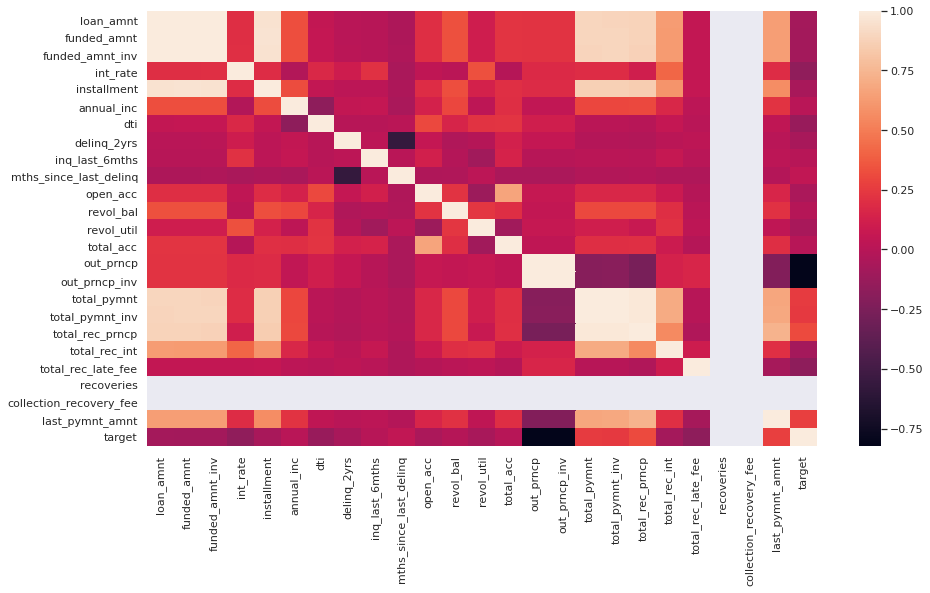

In [21]:
sns.heatmap(df.corr());

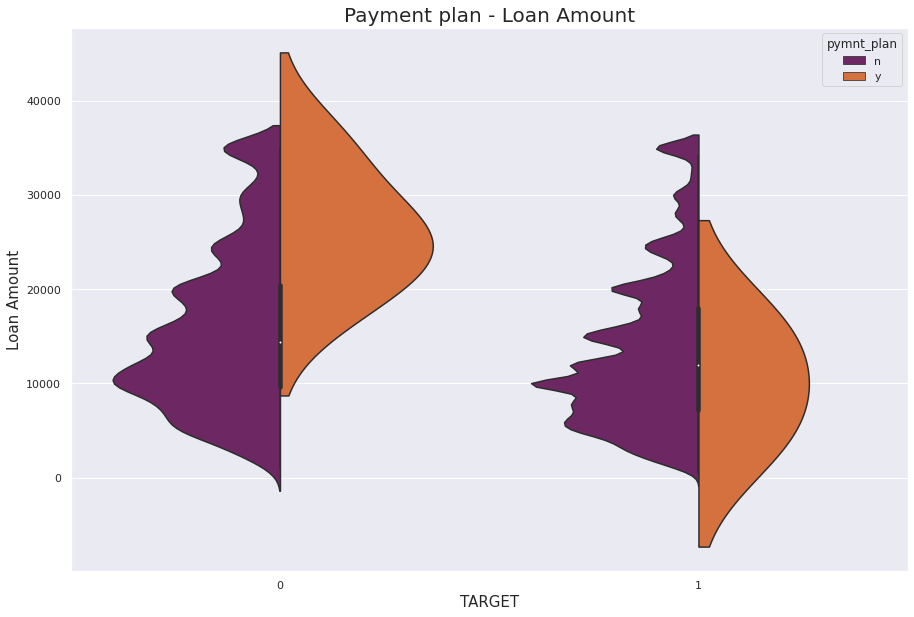

In [22]:

sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="target",y="loan_amnt",data=df, hue="pymnt_plan", split=True,palette='inferno')
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

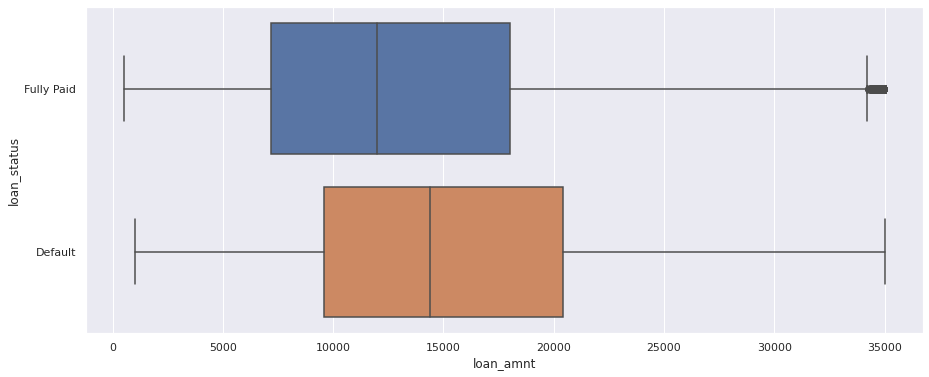

In [23]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='loan_amnt', y='loan_status', data=df)

Now I would like to know what kind of loans Lending Club usually issues? I guess this can be answered by having look at Loan Grade that Lending Club assigns.

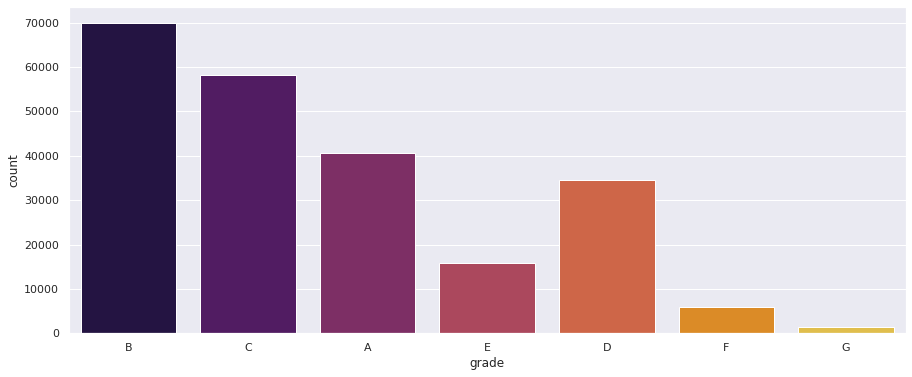

In [24]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(df['grade'], palette='inferno')

Since most of the loans are of B Grade, we should have a look at their loan amounts too

  grade     loan_amnt  ...  last_pymnt_amnt    target
0     A  12308.996378  ...      5659.342104  0.977725
1     B  12450.579742  ...      6148.129352  0.950820
2     C  13349.861836  ...      7455.655095  0.904126
3     D  14337.308314  ...      7943.660303  0.866954
4     E  17665.905658  ...     10461.471179  0.813645
5     F  19139.412856  ...     11656.864176  0.797368
6     G  21272.364058  ...     12580.802507  0.759947

[7 rows x 26 columns]


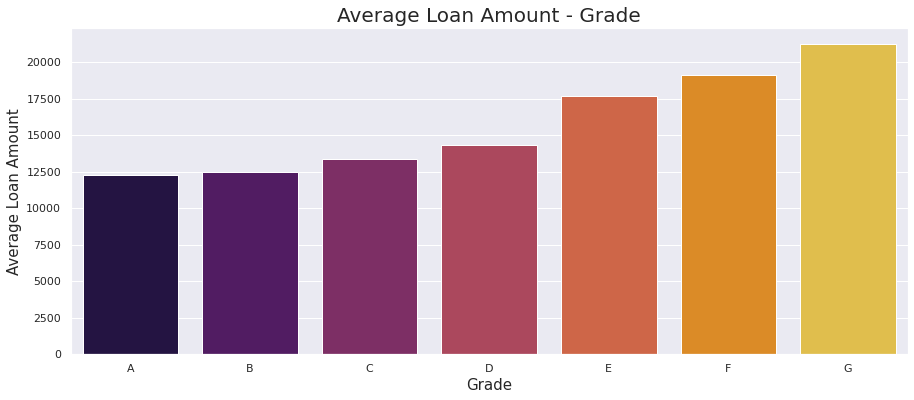

In [25]:
loan_grades = df.groupby("grade").mean().reset_index()
print(loan_grades)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=loan_grades, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

Average loan amount of A grade loans is least of all grades. I guess the higher the grade, lower the loan amount is issued

We should have a look at the interest rates offered for these loan grades.

In [26]:

interest = df.groupby('grade')['int_rate'].mean()

print(interest)

grade
A     7.490222
B    11.496682
C    14.528864
D    17.479817
E    20.198045
F    23.460499
G    25.317062
Name: int_rate, dtype: float64


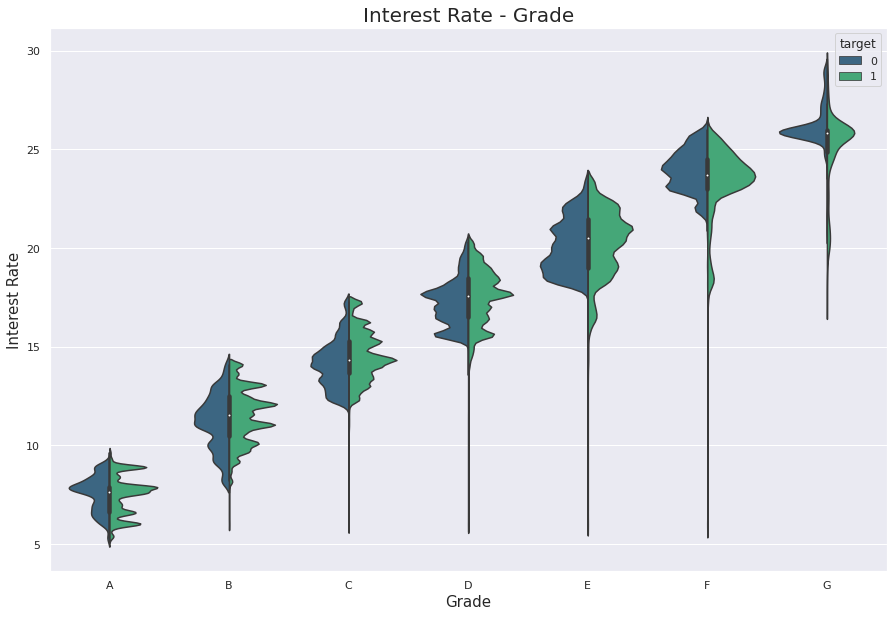

In [27]:

sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="grade", y="int_rate", data=df, palette='viridis', order="ABCDEFG",hue='target',split=True)
plt.title("Interest Rate - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

Our previous assumption was right. The higher the loan amount, higher the interest rate.

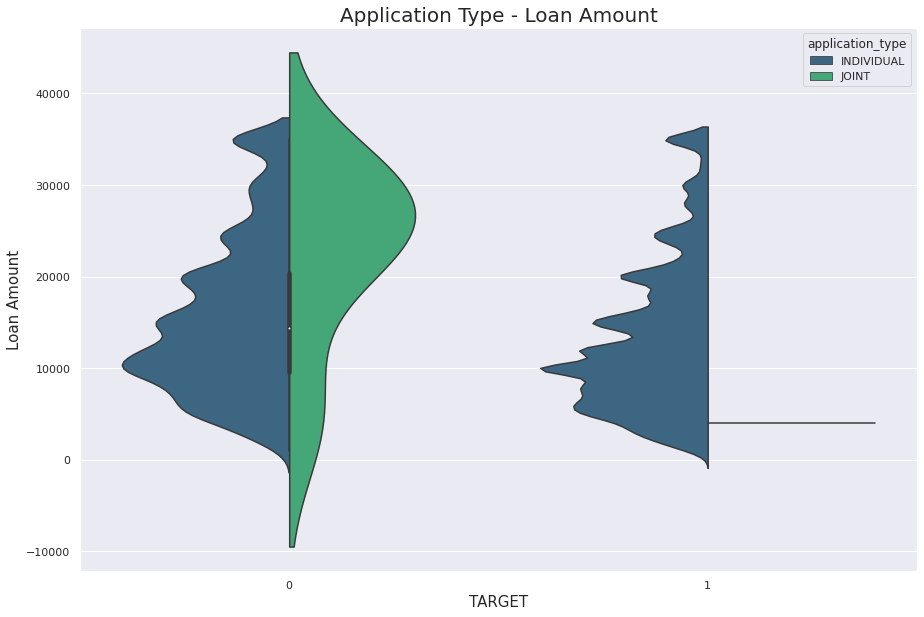

In [28]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="target",y="loan_amnt",data=df, hue="application_type", split=True,palette='viridis')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

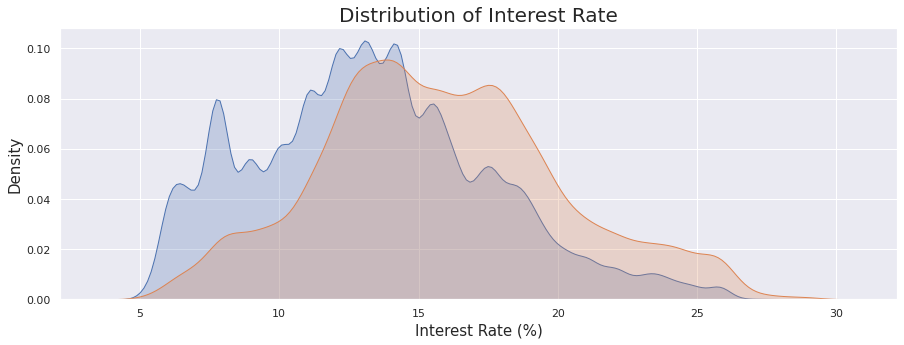

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(df.loc[df['target'] == 1, 'int_rate'], label = 'target = 1',shade=True)
sns.kdeplot(df.loc[df['target'] == 0, 'int_rate'], label = 'target = 0',shade=True);
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

To which state most of the fully paid loan cases belong?

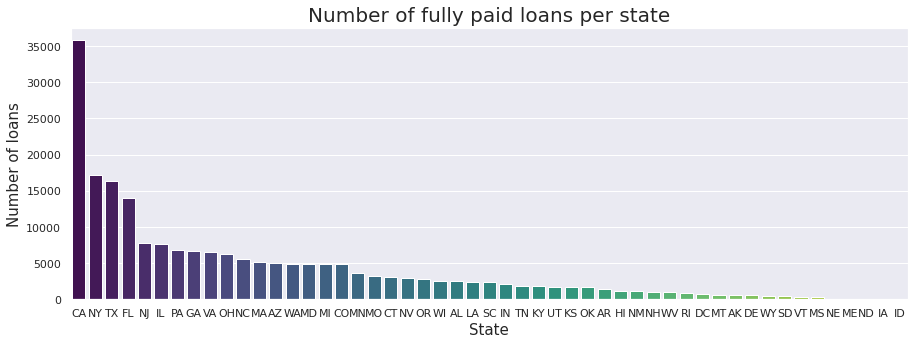

In [30]:
state_default = df[df['target']==1]['addr_state']
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(state_default, order=state_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of fully paid loans per state',fontsize=20);

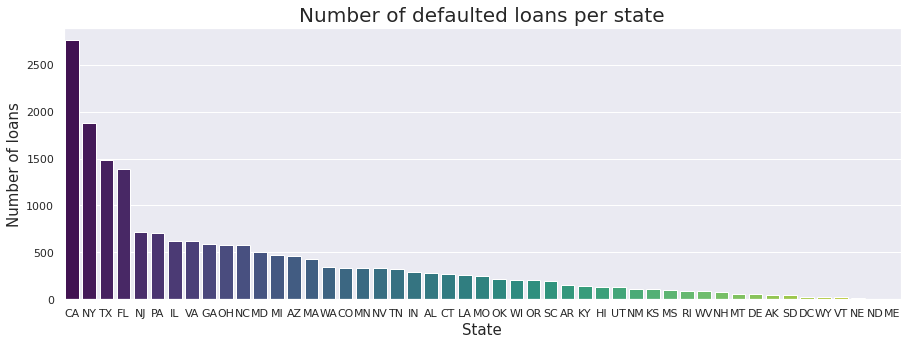

In [31]:
state_default = df[df['target']==0]['addr_state']

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(state_default, order=state_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

### Summary

* Since most of the customers have been employed for 10+ years, the majority ofcustomers are 30+ years of age.

* Interest rate varies wildly, reaching nearly 30% for high-risk loans

* Grade A has the lowest interest rate around 7.5%

* Grade G has the highest interest rate above 25%

* **The lower the grade, the higher loan amount loan issued**
* Fully Paid loans tend to be smaller. This could be due to the age of the loans

* Default has the highest count among other loan status.



* Most of the loans have interest rates between 12% and 18%
* California has the most defaulted and non-defaulted loans out of all the states in US
* States are not a distinguishing feature for predicting the defaulted loans.

# Cleaning The Data

In [32]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'loan_status', 'target'],
      dtype='object')

In [33]:
df.shape

(226786, 38)

In [34]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,loan_status,target
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,AZ,27.65,0,1,NaN,3,13648,83.7,9,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.00,0,0,2015-01-01,171.62,2016-01-01,INDIVIDUAL,Fully Paid,1
1,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,IL,8.72,0,2,NaN,2,2956,98.5,10,0.0,0.0,3003.653644,3003.65,2400.0,603.65,0.00,0,0,2014-06-01,649.91,2016-01-01,INDIVIDUAL,Fully Paid,1
2,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,other,CA,20.00,0,1,35.0,10,5598,21.0,37,0.0,0.0,12226.302210,12226.30,10000.0,2209.33,16.97,0,0,2015-01-01,357.48,2015-01-01,INDIVIDUAL,Fully Paid,1
3,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,n,wedding,AZ,11.20,0,3,NaN,9,7963,28.3,12,0.0,0.0,5631.377753,5631.38,5000.0,631.38,0.00,0,0,2015-01-01,161.03,2015-09-01,INDIVIDUAL,Fully Paid,1
4,3000,3000,3000.0,36 months,18.64,109.43,E,9 years,RENT,48000.0,Source Verified,2011-12-01,n,car,CA,5.35,0,2,NaN,4,8221,87.5,4,0.0,0.0,3938.144334,3938.14,3000.0,938.14,0.00,0,0,2015-01-01,111.34,2014-12-01,INDIVIDUAL,Fully Paid,1


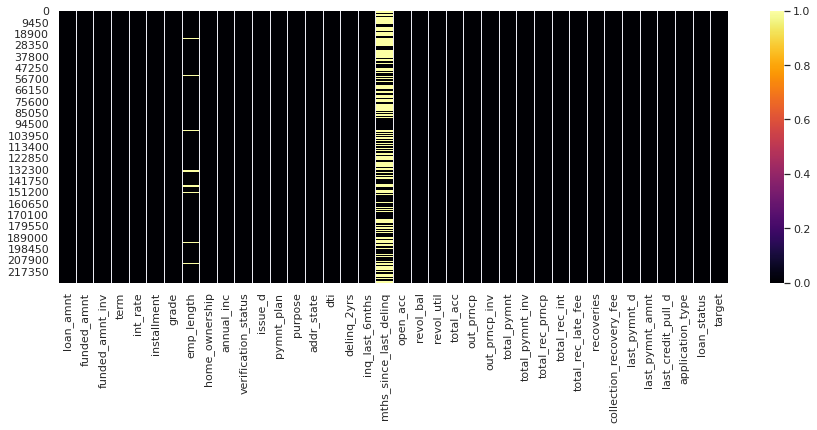

In [35]:
sns.heatmap(df.isna(),cmap = "inferno")

In [36]:
# dropping columns with more than 75% of null values.

In [37]:
nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)
drop_cols = nulls[nulls['null_percent']>=75.0].index
df.drop(drop_cols, axis=1, inplace=True)

In [38]:
df.shape  

(226786, 38)

In [39]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'loan_status', 'target'],
      dtype='object')

Now we should convert date object columns to integer years or months so that we can easily encode other categorical features without exhausting our resources. For filling the dates, I am gonna use the most used dates in that feature

In [40]:
import time
from sklearn.preprocessing import MinMaxScaler

In [41]:
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2014-01-01")).astype(int)
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna("2015-12-01")).astype(int)
df['issue_d']= pd.to_datetime(df['issue_d']).astype(int)

In [42]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

In [43]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

In [44]:
df.drop(['loan_status'],axis=1,inplace=True) # since we have already converted it to target column 

In [45]:
df.drop(['recoveries','collection_recovery_fee','pymnt_plan','issue_d'],axis = 1,inplace=True)

In [46]:
df.dropna(inplace=True)

# Preprocessing data

In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [48]:
# mapping categorical variables to numeric 


In [49]:
emp_length_mapping = {
    '< 1 year' : 0,
    '1 year'   : 1,
    '2 years'   : 2,
    '3 years'   : 3,
    '4 years'   : 4,
    '5 years'   : 5,
    '6 years'   : 6, 
    '7 years'   : 7,
    '8 years'   : 8,
    '9 years'   : 9,
    '10+ years':10
}

In [50]:
df.emp_length = df.emp_length.map(emp_length_mapping)
df.emp_length = df.emp_length.fillna(df.emp_length.mode(dropna=True))

In [51]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

In [52]:
grade_mapping = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7
}

In [53]:
df['grade'] = df.grade.map(grade_mapping)


In [54]:
enc = OneHotEncoder(handle_unknown='ignore')

In [56]:
count = 0
categorical = []
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
        else:
          categorical.append(col)
          
print("Categorical length : "+ str(len(categorical)))
for col in categorical:
  print(col, df[col].nunique())
  print('----------------------------------')
print('%d columns were label encoded.' % count)

term
application_type
Categorical length : 4
home_ownership 6
----------------------------------
verification_status 3
----------------------------------
purpose 14
----------------------------------
addr_state 51
----------------------------------
2 columns were label encoded.


In [58]:
df = pd.get_dummies(df)

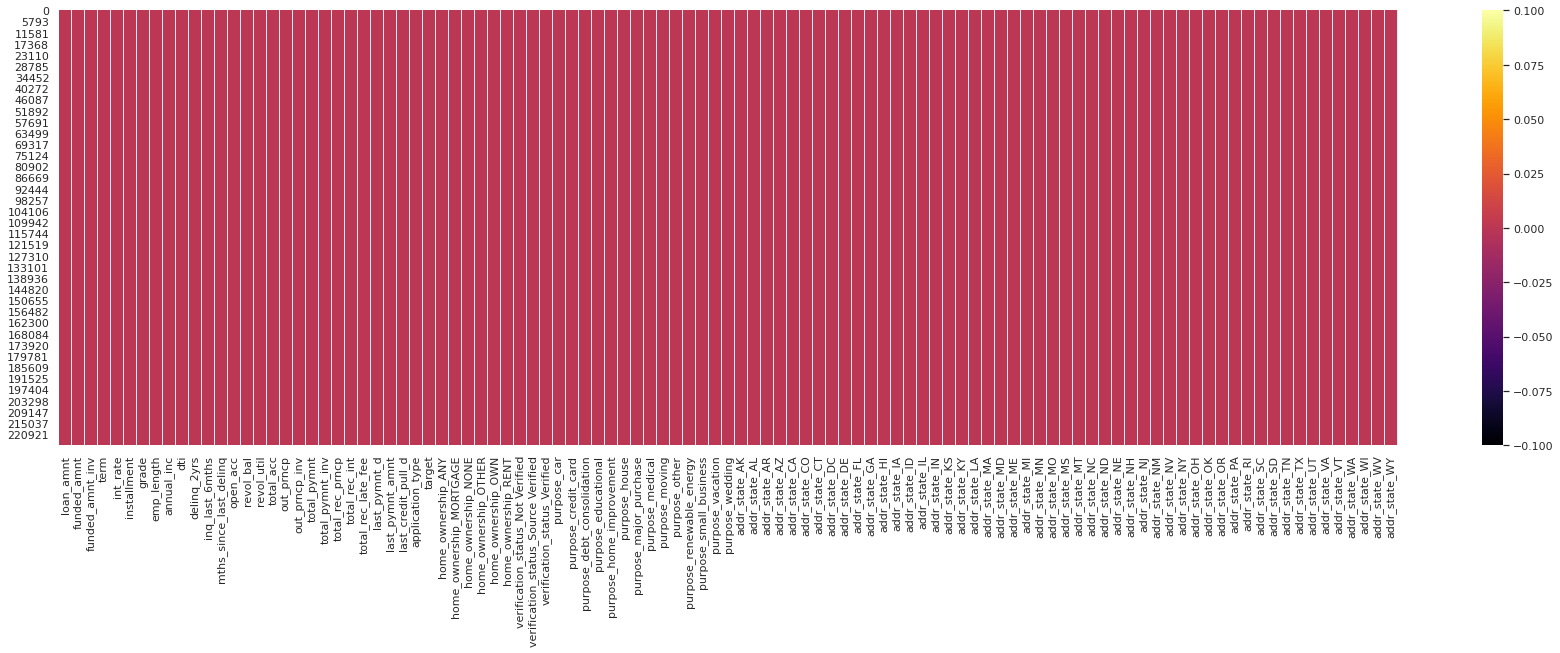

In [59]:
sns.set(rc={'figure.figsize':(30,8)})
sns.heatmap(df.isna(),cmap='inferno')

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.loc[:, df.columns != 'target']
y = df['target']

Now, let's apply the train_test_split function. Here, we set the test size to 30% and train size to 70% of the entire dataset.
i.e. test_size=0.3


In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21,shuffle = True)

NameError: name 'train_test_split' is not defined

In [64]:
print(X_train.shape)
print(X_test.shape)

(152870, 102)
(65516, 102)


In [65]:
# Dividing dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21,shuffle = True)

print(X_train.shape)
print(X_test.shape)

from imblearn.over_sampling import SMOTE  

print("Number of observations in each class before oversampling (training data): \n", pd.Series(y_train).value_counts()) #implementing SMOTE to balance the dataset

smote = SMOTE(random_state = 101)
X_train,y_train = smote.fit_sample(X_train,y_train)

print("Number of observations in each class after oversampling (training data): \n", pd.Series(y_train).value_counts())


(152870, 102)
(65516, 102)
Number of observations in each class before oversampling (training data): 
 1    140161
0     12709
Name: target, dtype: int64
Number of observations in each class after oversampling (training data): 
 1    140161
0    140161
dtype: int64


In [66]:
# Creating Machine Learning models 

In [67]:
#Random Forest Classifier

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE  
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Tuning random forest parameter using 'n_estimators'  
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [100,200,250]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='accuracy', cv=5) #using accuracy as the parameter as we need to maximize the accuracy 

#using cross validation to avoid overfitting

gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ #Finding the best score for the estimator
print(best_result)

{'n_estimators': 100}
0.9999357888165523


out_prncp_inv          0.276363
out_prncp              0.257991
last_pymnt_amnt        0.109351
last_pymnt_d           0.100317
last_credit_pull_d     0.052582
                         ...   
addr_state_ME          0.000000
addr_state_ND          0.000000
addr_state_NE          0.000000
home_ownership_NONE    0.000000
application_type       0.000000
Length: 102, dtype: float64
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5326
           1       1.00      1.00      1.00     60190

    accuracy                           1.00     65516
   macro avg       1.00      1.00      1.00     65516
weighted avg       1.00      1.00      1.00     65516



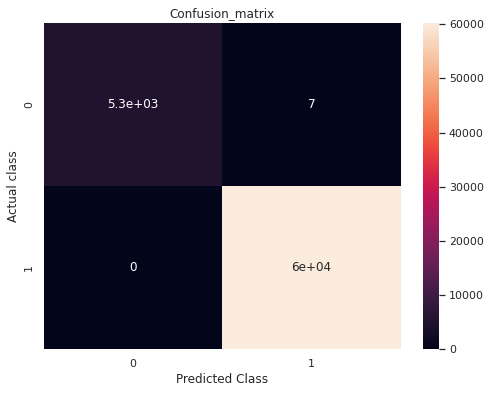

Confusion matrix: 
 [[ 5319     7]
 [    0 60190]]
TP:  60190
TN:  5319
FP:  7
FN:  0
0.9998931558703218


In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_test)
print('Classification report: \n', metrics.classification_report(y_test, Y_pred))

conf_mat = metrics.confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

print(accuracy_score(y_test, Y_pred))



In [71]:
# Selecting features with higher sifnificance and redefining feature set
X1 = df[['out_prncp_inv','out_prncp','last_pymnt_amnt','last_pymnt_d', 'last_credit_pull_d']]

feature_scaler = StandardScaler()
X1_scaled = feature_scaler.fit_transform(X1)

In [72]:
# Dividing dataset into training and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1_scaled, y , test_size = 0.3, random_state = 100)

smote = SMOTE(random_state = 101)
X1_train,Y1_train = smote.fit_sample(X1_train,Y1_train)

out_prncp_inv         0.462287
out_prncp             0.406259
last_pymnt_amnt       0.078030
last_pymnt_d          0.047253
last_credit_pull_d    0.006171
dtype: float64
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5376
           1       1.00      1.00      1.00     60140

    accuracy                           1.00     65516
   macro avg       1.00      1.00      1.00     65516
weighted avg       1.00      1.00      1.00     65516



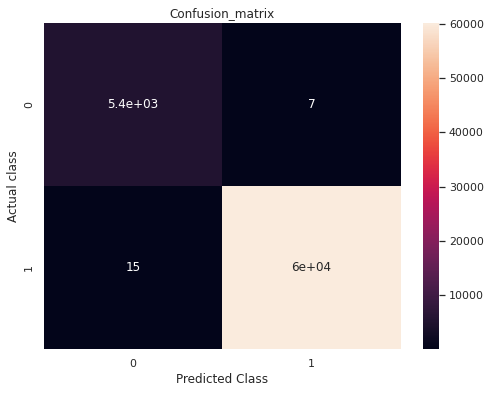

Confusion matrix: 
 [[ 5369     7]
 [   15 60125]]
TP:  60125
TN:  5369
FP:  7
FN:  15
0.9996642041638684


In [73]:
## Random forest using selected features 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X1_train,Y1_train)

featimp = pd.Series(rfc.feature_importances_, index=list(X1)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X1_test)
print('Classification report: \n', metrics.classification_report(Y1_test, Y_pred))

conf_mat = metrics.confusion_matrix(Y1_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])


print(accuracy_score(Y1_test, Y_pred))



In [74]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [75]:
# adaboost model

In [76]:
abc = AdaBoostClassifier(random_state=1)
grid_param = {'n_estimators': [100,110,120]}

gd_sr = GridSearchCV(estimator=abc, param_grid=grid_param, scoring='accuracy', cv=5) #using accuracy as scoring paramter 

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'n_estimators': 100}
0.99994649068046


int_rate           0.12
last_pymnt_amnt    0.11
dti                0.07
installment        0.06
revol_util         0.06
                   ... 
addr_state_LA      0.00
addr_state_MA      0.00
addr_state_MD      0.00
addr_state_ME      0.00
purpose_wedding    0.00
Length: 102, dtype: float64
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5326
           1       1.00      1.00      1.00     60190

    accuracy                           1.00     65516
   macro avg       1.00      1.00      1.00     65516
weighted avg       1.00      1.00      1.00     65516



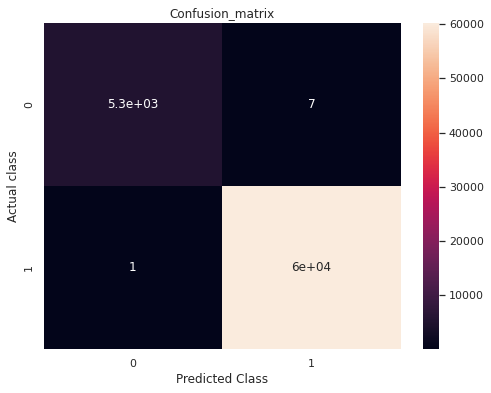

Confusion matrix: 
 [[ 5319     7]
 [    1 60189]]
TP:  60189
TN:  5319
FP:  7
FN:  1
0.9998778924232249


In [77]:
# Building AdaBoost using the tuned parameter
abc = AdaBoostClassifier(n_estimators=100, random_state=1)
abc.fit(X_train,y_train)

featimp = pd.Series(abc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = abc.predict(X_test)
print('Classification report: \n', metrics.classification_report(y_test, Y_pred))

conf_mat = metrics.confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

print(accuracy_score(y_test, Y_pred))



In [77]:
#trying Neural network importing library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [78]:
#Now creating ANN model using keras regression 

model = Sequential()
model.add(Dense(102, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


kera = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25)
print("Test-Accuracy:", np.mean(kera.history["val_accuracy"]))





term
application_type
Epoch 1/25
2048/2048 [==============================] - 8s 3ms/step - loss: 1558033930756172.0000 - accuracy: 0.8444 - val_loss: 138790182060032.0000 - val_accuracy: 0.9180
Epoch 2/25
2048/2048 [==============================] - 6s 3ms/step - loss: 414247205113774.0625 - accuracy: 0.8469 - val_loss: 536797461348352.0000 - val_accuracy: 0.9180
Epoch 3/25
2048/2048 [==============================] - 6s 3ms/step - loss: 268016829448903.6562 - accuracy: 0.8464 - val_loss: 66143192612864.0000 - val_accuracy: 0.9179
Epoch 4/25
2048/2048 [==============================] - 6s 3ms/step - loss: 105636713649829.1719 - accuracy: 0.8515 - val_loss: 29293648281600.0000 - val_accuracy: 0.9178
Epoch 5/25
2048/2048 [==============================] - 6s 3ms/step - loss: 76477545527832.7344 - accuracy: 0.8456 - val_loss: 23844219781120.0000 - val_accuracy: 0.9180
Epoch 6/25
2048/2048 [==============================] - 6s 3ms/step - loss: 37865676372464.7578 - accuracy: 0.8505 - val_

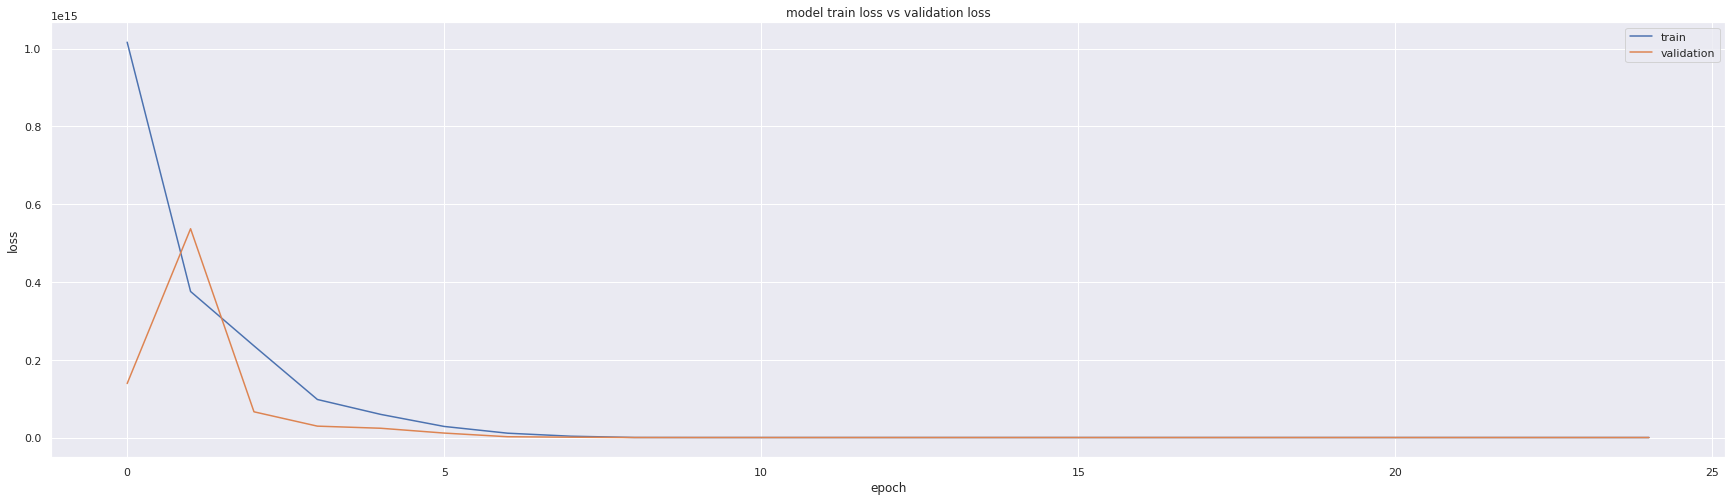

In [79]:
#Plotting loss and validation loss
from matplotlib import pyplot
pyplot.plot(kera.history['loss'])
pyplot.plot(kera.history['val_loss'])
pyplot.title('model train loss vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

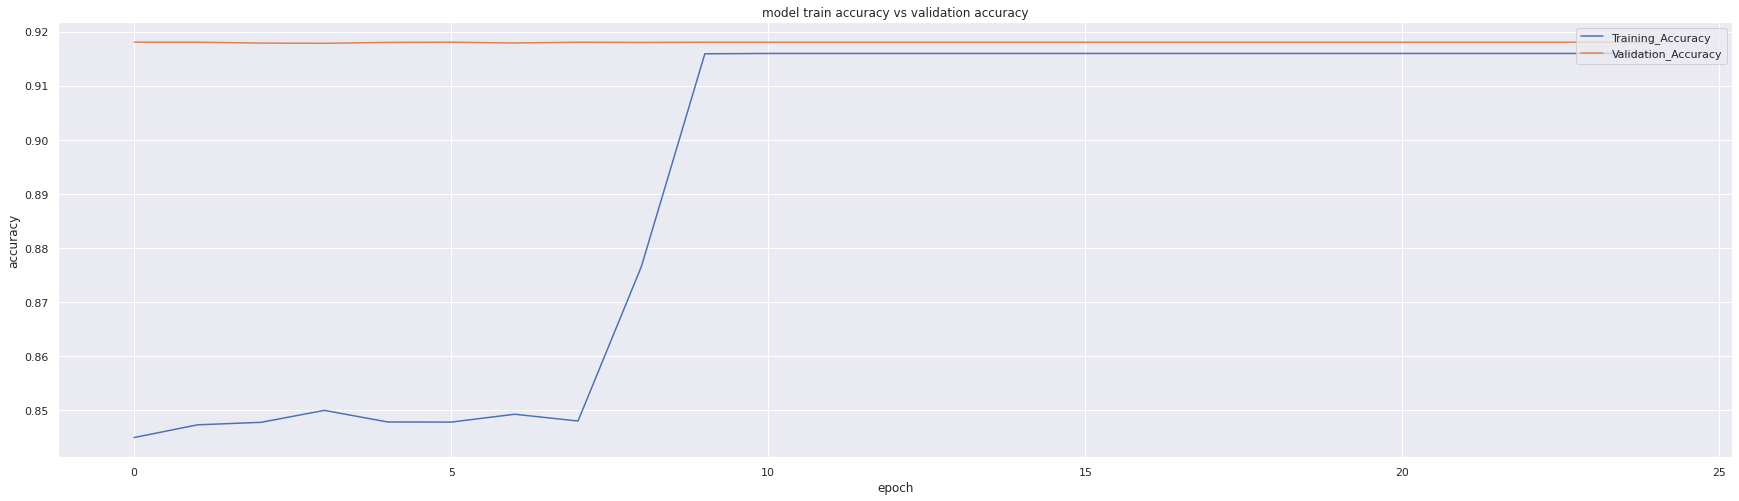

In [80]:
#Plotting accuracy and validation accuracy
from matplotlib import pyplot
pyplot.plot(kera.history['accuracy'])
pyplot.plot(kera.history['val_accuracy'])
pyplot.title('model train accuracy vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['Training_Accuracy', 'Validation_Accuracy'], loc='upper right')
pyplot.show()